<a href="https://colab.research.google.com/github/MichaelNovella/cs191tturnin/blob/main/Backpropagation_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Backpropagation Programming by Michael Novella

# Previous problem
This is a basic feed forward network with one hidden layer (Z) for better performance to get to Y.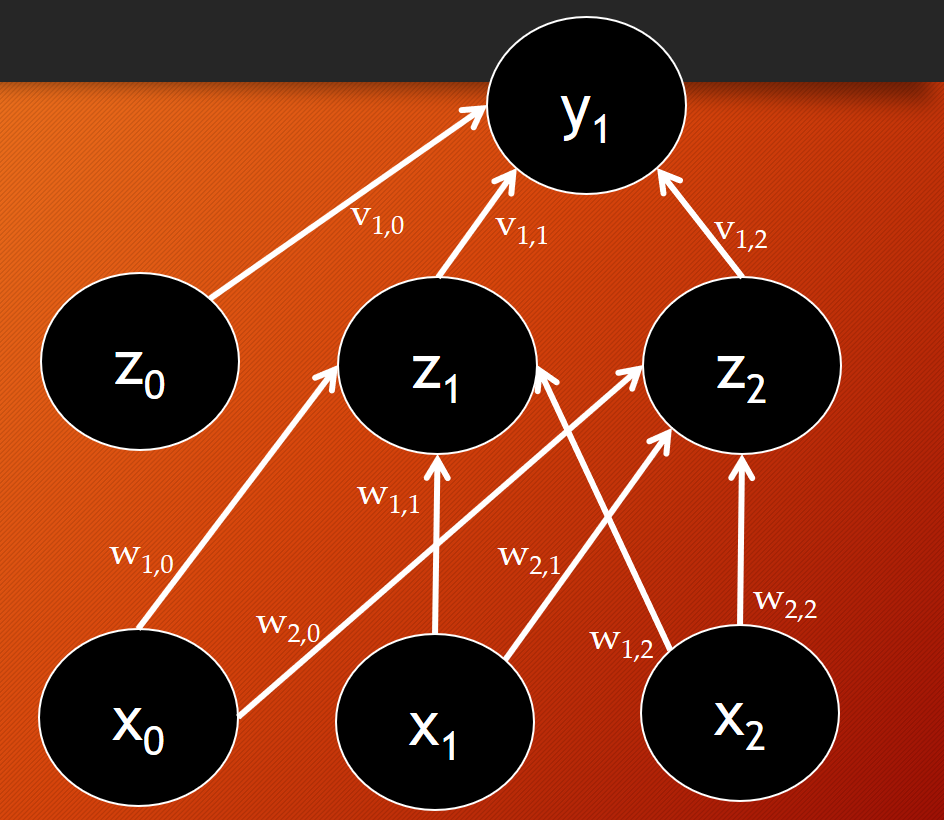 

## Initial Setup
This is part of the initial setup for the program the libraries that it will be using.

In [9]:
import math
import numpy as np

These are the functions that the program will use to find the z values in the network and then find the y value at the end. This being the sigmoid fucntion to find the middle nodes and the f function to find the y value 

In [56]:
f = lambda W,X: sum([w*x for w,x in zip(W,X)])
g = lambda Z: 1 / (1 + np.exp(-Z))
classify = lambda Y: [1 if y > 0.5 else 0 for y in Y]

These are the data points that will be worked on and fed into this network one by one to get individual Y values. which will be needed to slighlty modify for a default 1 placeholder since the sigmoid function will need three variables, but only two are provided. and used within the function $F(W,X)= \sum_{i=0}^n W_i0 + W_i1*X_1 + W_(i,2)*X_2$. the Wij being that we will take in multiple weights for the network In this case we will find the last value by $F(V,Z)= \sum_{i=0}^n V_0 + V_1*Z_1 + V_2*Z_2$, this won't be needed until we use the sigmoid to find the hidden row in the network.

In [11]:
data = [ (0,0), (0,1), (1,0), (1,1) ]
X = [(1,)+ tuples for tuples in data]
w1 = [2.77, -6.34,-6.10]
w2 = [10.17,-6.44,-6.671]
v1 = [-7.07,-14.55,14.33]
print("X datapoints:", X)

X datapoints: [(1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


## Middle Z evaluation
This is where we go from the x level to the z level via the sigmoid function. From this we need to find out the value for Z1 and Z2 since Z0 will always be one. We feed in the the two weights to find each node from each datapoint to each Z node. 

In [ ]:
z1 = [g(f(w1,x)) for x in X]
print("Z1 values with W1: ",z1)
z2 = [g(f(w2,x)) for x in X]
print("Z2 values with W2: ",z2)
Z = [(1,Z1,Z2) for Z1,Z2 in zip(z1,z2)]
print("The values Y wil take in are:", Z)

Z1 values with W1:  [0.9410329865352083, 0.034556230286276524, 0.027384810950125685, 6.314586768170159e-05]
Z2 values with W2:  [0.9999616991435952, 0.9706593028283403, 0.9765693323263297, 0.050163604533828295]
The values Y wil take in are: [(1, 0.9410329865352083, 0.9999616991435952), (1, 0.034556230286276524, 0.9706593028283403), (1, 0.027384810950125685, 0.9765693323263297), (1, 6.314586768170159e-05, 0.050163604533828295)]


## Calculating The Y value
This is the second to last step with the network is to find the Y value using the linear function with the Z nodes as input and the weights as V1.

In [ ]:
Y = [f(v1,z) for z in Z]
print("Y values for the last node",Y)



Y values for the last node [-6.432578805359562, 6.336754658864794, 6.5257895329119755, -6.35207431940501]


## setting and predicting
This is to display the datapoints and the output Y value and then classify them based on whether the indivual Y value is greater then 0.5 from the linear function.

In [ ]:
unclassedpredict = list(zip(data, Y))
print("The expected values for the Datapoints: ", unclassedpredict)
classedpredictY = [1 if g(y) > 0.5 else 0 for y in Y]
classedpredict = list(zip(data, classedpredictY))
print("The expected values for the Datapoints: ", classedpredict)

The expected values for the Datapoints:  [((0, 0), -6.432578805359562), ((0, 1), 6.336754658864794), ((1, 0), 6.5257895329119755), ((1, 1), -6.35207431940501)]
The expected values for the Datapoints:  [((0, 0), 0), ((0, 1), 1), ((1, 0), 1), ((1, 1), 0)]


# Introduction to New Problem
This is a new problem that will implement the feedforward from the previous asignment to make it now have the ability to alter the weights to provide a better outcome. First we need to try to make a function to run what we did previously. This will do the basic steps of the network to find the Y value and will help make this algorithm for updating the weights. This will have a seed implemented in the random number generator for other people to recreate the conditions that I have and provide a stable random value for weights.

In [54]:
data = [ ( (0,0), 0 ), ( (0,1), 1 ), ( (1,0), 1), ( (1,1), 0 ) ]
np.random.seed(883946446)
w1 = np.random.uniform(-0.01,0.01,3)
w2 = np.random.uniform(-0.01,0.01,3)
v1 = np.random.uniform(-0.01,0.01,3)
alpha = 0.01
print("inital weights\n W1: ",w1,"\n W2: ",w2, "\n V1: ",v1)
print("alpha: ",alpha)

inital weights
 W1:  [0.00321137 0.00666658 0.00210818] 
 W2:  [-0.00215496  0.00373312 -0.0051172 ] 
 V1:  [-0.00462104 -0.00694888  0.00690732]
alpha:  0.01


This will be a function for both updating and getting the intermediary values like z1,z2,y. and updating v1,w1,w2 for later in the loop. These functions will be based off of this pseudocode and will be the main function of this and will be more of the same stuff as above with some slight alteration on generating y for this is a classification problem and I will be putting a sigmoid on getting y. 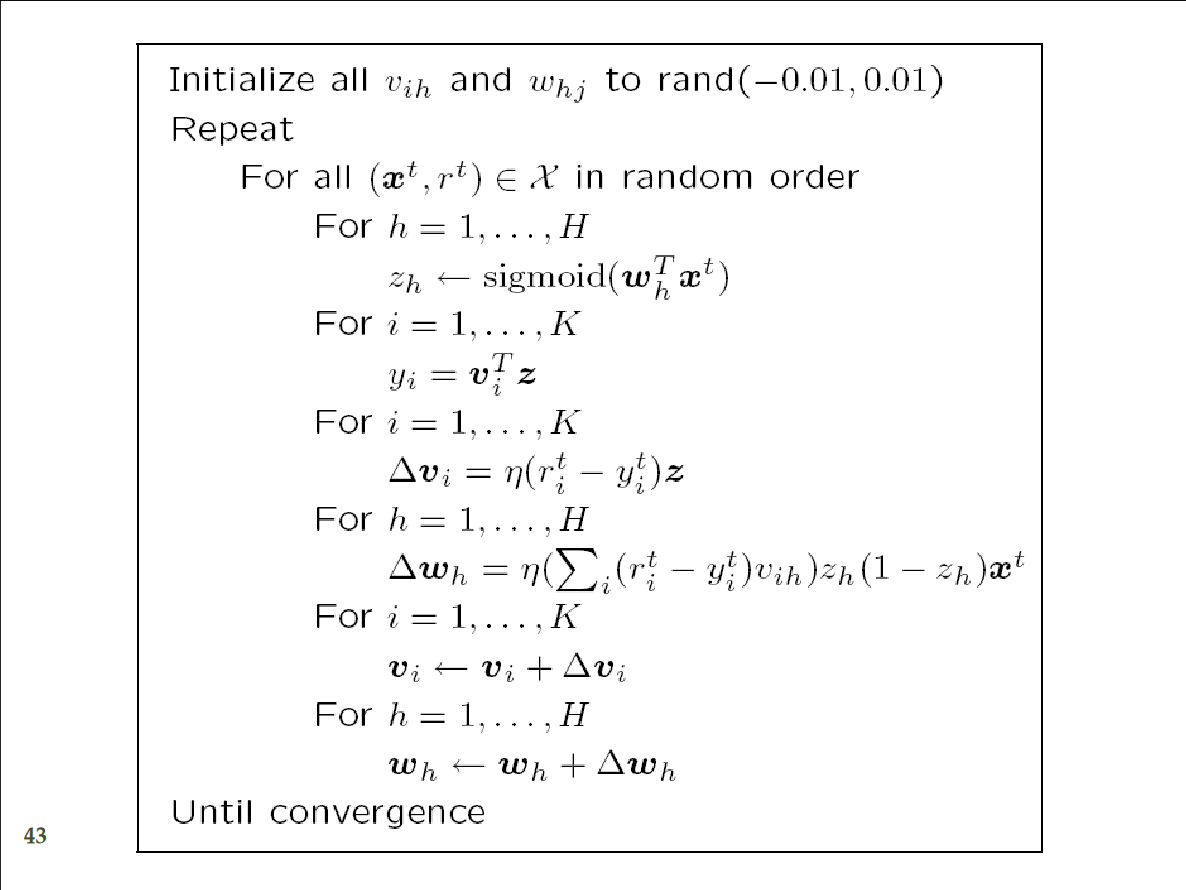

In [100]:
def squared_error(rs,ys):
  errors = -2*(rs-ys)*ys*(1-ys) 
  print("the error for this is: ",errors)

def delta_v(rs,ys,zs):
  vn = [alpha* (rs-ys)*z for z in zs]
  print("the dV1 is:",vn)
  return vn
def delta_weights(rs,ys,zs,xs,vs,place):
  dw = [alpha*((rs-ys)*vs)*zs*(1-zs)*x for x in xs]
  print("the new dW",place, " is: ",dw)
  return dw
def update_weight(ws,dw,weightname):
  new_weight = [w + z for w,z in zip(ws,dw)]
  print("the new ", weightname, " is: ",new_weight)
  return new_weight
def accuracy(rs,ys):
  for real,predict in zip(rs,ys):
    if real == 1 and predict == 1:
      tp += 1
    elif real == 1 and predict == 0:
      fn += 1
    elif real == 0 and predict == 1:
      fp += 1
    else:
      tn += 1
  print("recall: ", (tp/(tp+fn)))
  print("precision: ", (tp/(tp+fp)))
  print("error: ", ((fn+fp) / len(rs)))

The previous code field was mainly setting the functions that will be used in the next section. This will be implemting that to the full pseudo code. The problem of convergence will not be solved in this section, but will go for 10000 runs and will show Initial Random Weights,Learning Rate,Final Weights,Outputs for data,Squared Error,and Accuracy. The previous sections also have functions not included in the pseduocode for better evaluation. Accuracy here will be showing the precision and recall for the current model.

In [107]:
np.random.shuffle(data)
print("inital shuffled data: ",data)
for n in range(200):
  for x,r in data:
    X = (1,) + x
    print("the x inputs are: ",X)
    z1 = g(f(w1,X)) 
    z2 = g(f(w2,X))
    zs = (1,z1,z2)
    print("the next layer and value for the z nodes are: ",zs)
    Y = g(f(v1,zs))
    print("accuracy:",Y)
    print("the predicted value for y is: ",Y)
    classedpredictY = 1 if Y > 0.5 else 0 
    classedpredict = (X, classedpredictY)
    print("The expected values for the Datapoints: ", classedpredict)
    squared_error(r,Y)
    dv = delta_v(r,Y,zs)
    dw1 = delta_weights(r,Y,z1,X,v1[1],1)
    dw2 = delta_weights(r,Y,z2,X,v1[2],2)
    print("the previous W1", w1)
    w1 += dw1
    print("the new W1 is:",w1)
    print("the previous W2", w2)
    w2 += dw2
    print("the new W2 is:",w2)
    print("the previous V1", v1)
    v1 += dv
    print("the new V1 is:",v1)
    print("------------------------------")
  np.random.shuffle(data)
  print("+++++++++++++new random set++++++")

Streaming output truncated to the last 5000 lines.
the error for this is:  -0.25012793316975485
the dV1 is: [0.005002559974760321, 0.002476185213431035, 0.0024659948618430245]
the new dW 1  is:  [-7.00872790626922e-06, -7.00872790626922e-06, -0.0]
the new dW 2  is:  [9.976899528116869e-06, 9.976899528116869e-06, 0.0]
the previous W1 [-0.01670114 -0.00336508 -0.00775133]
the new W1 is: [-0.01670815 -0.00337209 -0.00775133]
the previous W2 [-0.02197062 -0.00624491 -0.01493621]
the new W2 is: [-0.02196065 -0.00623493 -0.01493621]
the previous V1 [-0.002183   -0.00560468  0.00797902]
the new V1 is: [ 0.00281956 -0.00312849  0.01044502]
------------------------------
the x inputs are:  (1, 0, 1)
the next layer and value for the z nodes are:  (1, 0.49388543680479974, 0.4907768315008093)
accuracy: 0.5016001488734007
the predicted value for y is:  0.5016001488734007
The expected values for the Datapoints:  ((1, 0, 1), 1)
the error for this is:  -0.24919737328116953
the dV1 is: [0.0049839985112